In [31]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph

In [32]:
class AgentState(TypedDict):
    values : List[int]
    operation: str
    result : str
    
    

In [33]:
def process_value(state: AgentState) -> AgentState:
    """ This function handles multiple different inputs"""
    print(state)
    if state['operation'] == '+':
        state['result'] = f"The sum of your values is {sum(state['values'])}"
    elif state['operation'] == '*':
        product = 1
        for v in state['values']:
            product *= v
        state['result'] = f"The product of your values is {product}"
    print(state)
    return state

In [34]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_value)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()


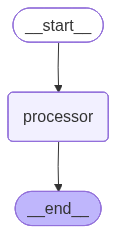

In [38]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
answer = app.invoke({"values": [1,2,3,4], "operation": "+"})

{'values': [1, 2, 3, 4], 'operation': '+'}
{'values': [1, 2, 3, 4], 'operation': '+', 'result': 'The sum of your values is 10'}


In [37]:
print(answer["result"])

The sum of your values is 10
